### Background:
A data set about medical costs of people characterized by certain attributes:

age : age of primary beneficiary.

sex : insurance contractor gender, female, male.

bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

children : Number of children covered by health insurance / Number of dependents.

smoker : Smoking.

region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges : Individual medical costs billed by health insurance.

### Objective:
● Exploratory Data Analysis

● Practicing statistics using Python

● Hypothesis testing

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from  statsmodels.formula.api import ols

sns.set(color_codes = True)
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline

In [3]:
df = pd.read_csv('insurance.csv')
df.head()  # display the first a few rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,"16,884.92"
1,18,male,33.77,1,no,southeast,"1,725.55"
2,28,male,33.00,3,no,southeast,"4,449.46"
3,33,male,22.70,0,no,northwest,"21,984.47"
4,32,male,28.88,0,no,northwest,"3,866.86"


## Exploratory Data Analysis

In [109]:
df.shape  # shape of data

(1338, 7)

In [110]:
df.dtypes  # data types for attributes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**observation:**
"age" and "children" are integer, "bmi" and "charges" are float, others are string.

In [111]:
df.isnull().sum()  # check the presence of missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**observation:**
no missing value in any of the columns.

In [112]:
df.describe()  # summary of the numberical data

,age,bmi,children,charges
count,"1,338.00","1,338.00","1,338.00","1,338.00"
mean,39.21,30.66,1.09,"13,270.42"
std,14.05,6.10,1.21,"12,110.01"
min,18.00,15.96,0.00,"1,121.87"
25%,27.00,26.30,0.00,"4,740.29"
50%,39.00,30.40,1.00,"9,382.03"
75%,51.00,34.69,2.00,"16,639.91"
max,64.00,53.13,5.00,"63,770.43"


**observation:**

age: from 18 - 64, both mean and median are 39.

bmi: from 16 - 53, both mean and median are about 30.

children covered by health insurance: from 0 - 5, median is 1, mean is 1.1.

charges: from 1122 - 63770, median is 9382, mean is 13270.

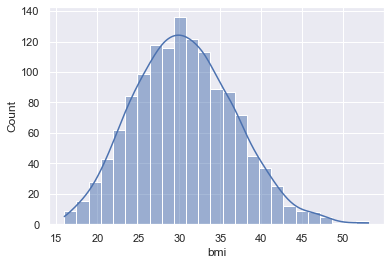

In [113]:
sns.histplot(x = df['bmi'], kde = True); # distribution of bmi

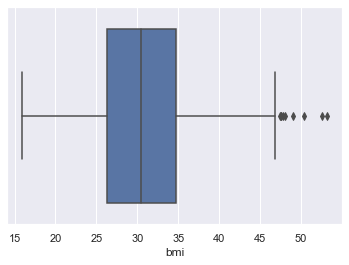

In [114]:
sns.boxplot(x = 'bmi', data = df); # boxplot of bmi

In [138]:
stats.skew(df['bmi'])   # skewness of bmi

0.28372857291709386

**observation:**
The distribution is almost symmetric. A few outliers are more than 45.

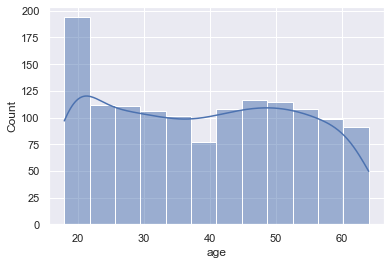

In [115]:
sns.histplot(x = df['age'],  kde = True); # distribution of age

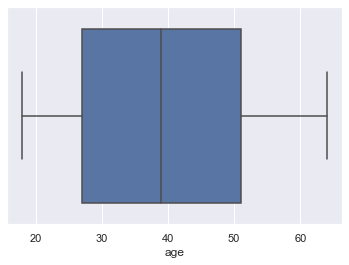

In [116]:
sns.boxplot(x = 'age', data = df); # boxplot of age

In [139]:
stats.skew(df['age'])   # skewness of age

0.055610083072599126

**observation:** No outliers. Hardly any skewness.

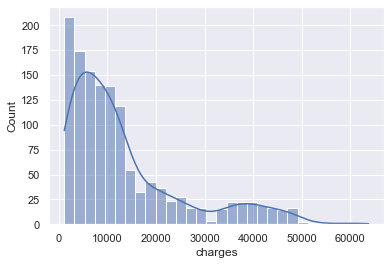

In [117]:
sns.histplot(x = df['charges'],  kde = True); # distribution of charges

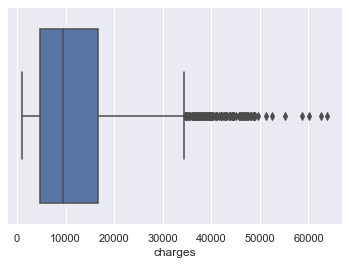

In [118]:
sns.boxplot(x = 'charges', data = df); # boxplot of charges

In [140]:
stats.skew(df['charges'])   # skewness of charges

1.5141797118745743

**observation:** A lot of outliers lie in 35000 - 65000. Right skewed distribution.

In [29]:
pd.crosstab(index = df['sex'], columns = 'count').T  # distribution of sex

sex,female,male
col_0,,
count,662,676


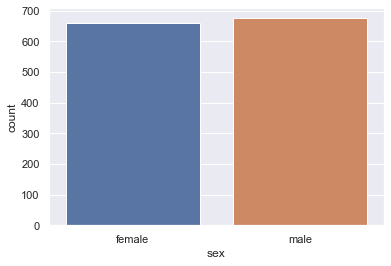

In [120]:
sns.countplot(x = 'sex', data = df);

**observation:**
Even distribution of females and males.

In [27]:
pd.crosstab(index = df['children'], columns = 'count').T  # distribution of children

children,0,1,2,3,4,5
col_0,,,,,,
count,574,324,240,157,25,18


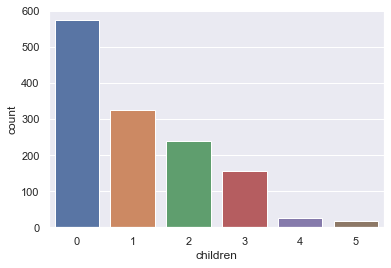

In [122]:
sns.countplot(x = 'children', data = df);

**observation:**
The case that no children covered in the insurance is the most common. Most instances have less than 2 children and very few have 4 or 5 children.

In [28]:
pd.crosstab(index = df['smoker'], columns = 'count').T  # distribution of smoker

smoker,no,yes
col_0,,
count,1064,274


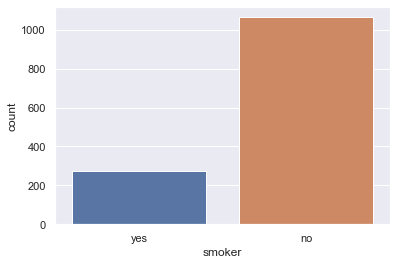

In [124]:
sns.countplot(x = 'smoker', data = df);

**observation:**
The number of smokers is much less than the number of non-smokers.

In [26]:
pd.crosstab(index = df['region'], columns = 'count').T  # distribution of region

region,northeast,northwest,southeast,southwest
col_0,,,,
count,324,325,364,325


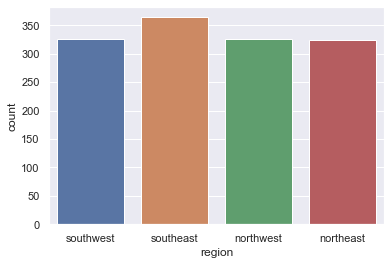

In [126]:
sns.countplot(x = 'region', data = df);

**observation:**
The number of insured in southeast is a bit higher than those of the other three regions.

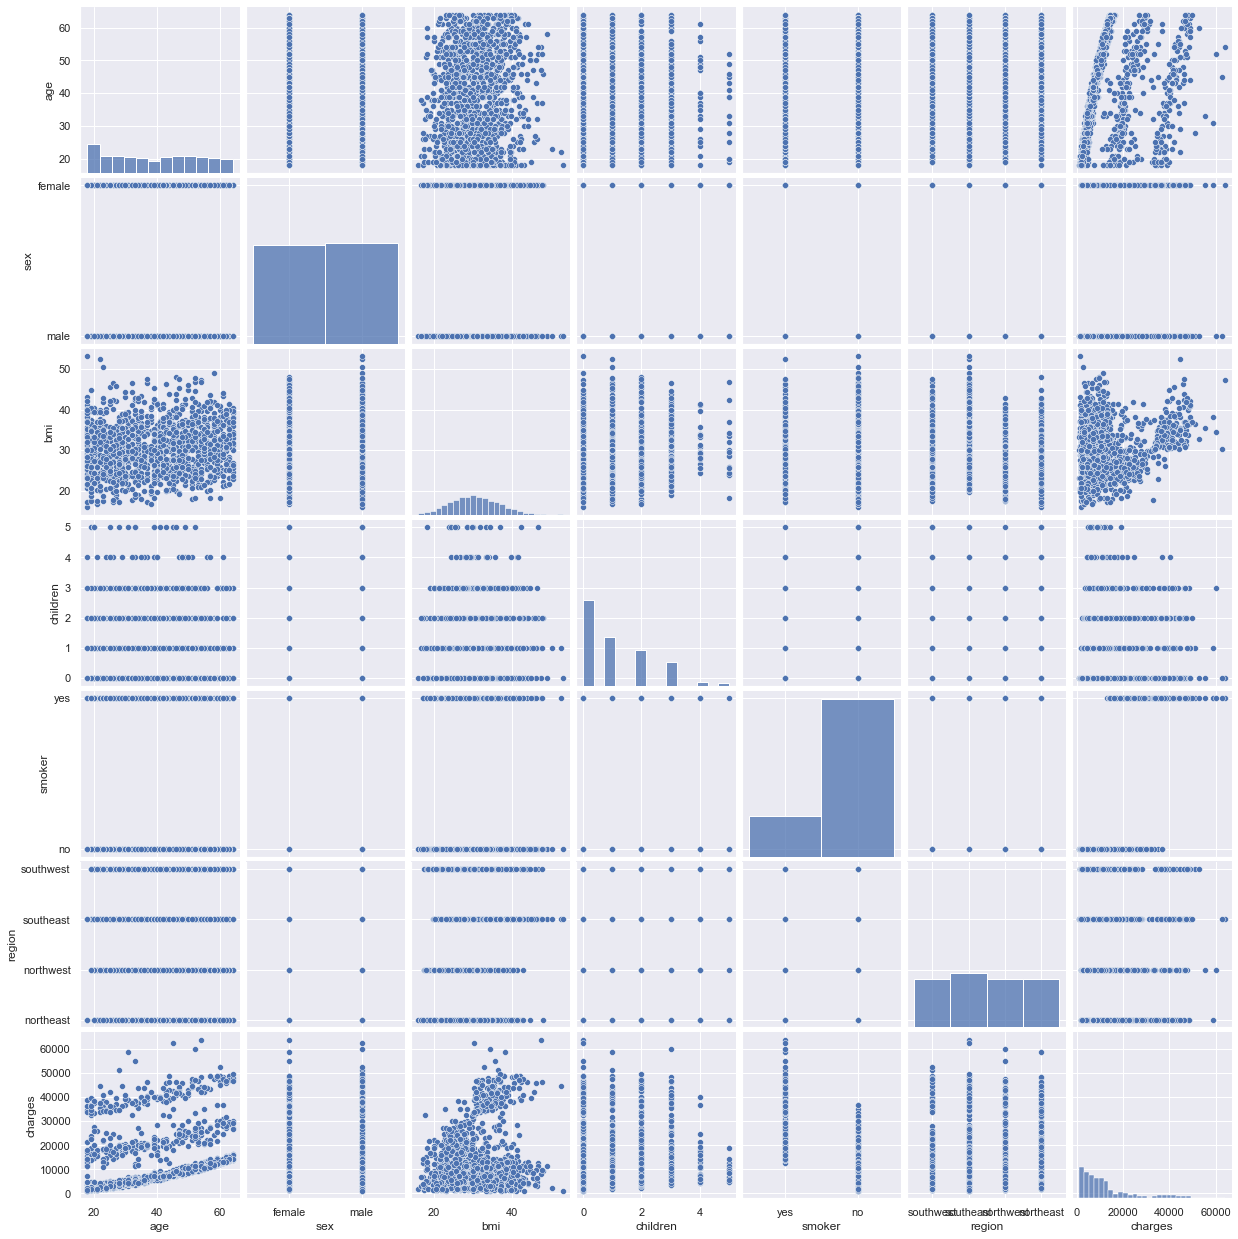

In [127]:
sns.pairplot(data = df, vars = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']);  # pairplot of all the columns

**observation:**

The individual medical cost tenders to be lower as the number of children covered in the health insurance becomes larger.

The charges of smokers are higher than non-smokers.

## Statistic Analysis

### a. Do charges of people who smoke differ significantly from the people who don't?

In [128]:
df. groupby('smoker')['charges'].describe()   # charges for smokers and non-smokers

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,"1,064.00","8,434.27","5,993.78","1,121.87","3,986.44","7,345.41","11,362.89","36,910.61"
yes,274.00,"32,050.23","11,541.55","12,829.46","20,826.24","34,456.35","41,019.21","63,770.43"


**Two sample independent t-test. Two tailed test:**

H0: charges of smokers are the same as charges of non-smokers.

Ha: charges of smokers are significantly different from charges of non-smokers.

In [129]:
smoker_chareges = df.loc[df['smoker'] == 'yes', 'charges']
nosmoker_chareges = df.loc[df['smoker'] == 'no', 'charges']
t_stat, p_val = stats.ttest_ind(smoker_chareges, nosmoker_chareges)
print('test statistic: ', t_stat, '\np value: ', p_val)

test statistic:  46.664921172723716 
p value:  8.271435842177219e-283


Given alpha = 0.05, p-value < alpha, reject H0.

**Conclusion:**
charges of people who smoke do differ significantly from the people who don't.

### b. Does bmi of males differ significantly from that of females?

In [130]:
df. groupby('sex')['bmi'].describe()   # bmi for both genders

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.00,30.38,6.05,16.82,26.12,30.11,34.31,48.07
male,676.00,30.94,6.14,15.96,26.41,30.69,34.99,53.13


**Two sample independent t-test. Two tailed test:**

H0: bmi of both genders are the same.

Ha: bmi of both genders are significantly different.

In [131]:
male_bmi = df.loc[df['sex'] == 'male', 'bmi']
female_bmi = df.loc[df['sex'] == 'female', 'bmi']
t_stat, p_val = stats.ttest_ind(male_bmi, female_bmi)
print('test statistic: ', t_stat, '\np value: ', p_val)

test statistic:  1.696752635752224 
p value:  0.08997637178984932


Given alpha = 0.05, p-value > alpha, fail to reject H0.

**Conclusion:**
bmi of males is the same as that of females.

### c. Is the proportion of smokers significantly different in different genders?

**Two sample z-test of proportion:**

H0: the proportion of smokers is the same in different genders.

Ha: the proportion of smokers is significantly different in different genders.

In [132]:
genders = df['sex'].value_counts().to_frame()
genders

,sex
male,676
female,662


In [133]:
#smokers = df.groupby('smoker')['sex'].value_counts().to_frame()
smokers = df.loc[df['smoker'] == 'yes', 'sex'].value_counts().to_frame()
smokers

,sex
male,159
female,115


In [134]:
z_stat, p_val = proportions_ztest(count = smokers['sex'], nobs = genders['sex'])
print('test statistic: ', z_stat, '\np value: ', p_val)

test statistic:  2.7867402154855503 
p value:  0.005324114164320532


Given alpha = 0.05, p-value < alpha, reject H0.

**Conclusion:** the proportion of smokers is significantly different in different genders.

### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

**One-way ANOVA:**

H0: the distribution of bmi across women with no children, one child and two children is the same.

Ha: at least one of the distribution of bmi across women with no children, one child and two children is different from the others.

In [15]:
df_female = df.loc[df['sex'] == 'female', :]
df_female.groupby('children')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,289.00,30.36,5.97,17.29,26.20,29.93,34.60,47.41
1,158.00,30.05,5.79,16.82,25.98,29.57,33.94,46.09
2,119.00,30.65,6.63,17.20,25.77,31.30,34.75,48.07
3,77.00,30.44,5.83,19.00,26.32,30.21,34.10,44.70
4,11.00,31.94,5.19,25.60,28.91,29.64,33.52,41.47
5,8.00,30.62,8.93,18.30,24.14,30.25,34.99,46.75


In [16]:
child0 = df_female.loc[df['children'] == 0, ['children', 'bmi']]
child1 = df_female.loc[df['children'] == 1, ['children', 'bmi']]
child2 = df_female.loc[df['children'] == 2, ['children', 'bmi']]
df_children_bmi = pd.concat([child0, child1, child2])
df_children_bmi

,children,bmi
0,0,27.90
5,0,25.74
9,0,25.84
11,0,26.29
13,0,39.82
...,...,...
1313,2,34.70
1319,2,26.32
1323,2,40.37
1328,2,24.23


In [21]:
model = ols(formula = 'children ~ bmi', data = df_children_bmi).fit()
anov_table = sm.stats.anova_lm(model, typ = 2)
anov_table

,sum_sq,df,F,PR(>F)
bmi,0.04,1.00,0.07,0.79
Residual,356.90,564.00,nan,nan


In [25]:
f_stat, p = stats.f_oneway(child0, child1, child2)  # another implementation with scipy
f_stat, p

(array([       inf, 0.33447201]), array([0.        , 0.71585799]))

Given alpha = 0.05, p-value > alpha, fail to reject H0.

**Conclusion:** the distribution of bmi across women with no children, one child and two children is the same.